In [1]:
import numpy as np
import pandas as pd
import time
import os
import re
import copy
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

# ExpW

In [2]:
frame = pd.read_csv('ExpW_OpenFace_result_with_expression_gender_race_age.csv')
frame.head()

,ImageName,Expression,race_preds,gender_preds,age_preds,race_scores,gender_scores,age_scores,face,confidence,...,AU10_r,AU12_r,AU14_r,AU15_r,AU17_r,AU20_r,AU23_r,AU25_r,AU26_r,AU45_r
0,angry_actor_104_0.jpg,0,Black,Male,20-29,[0.01164725 0.5489195 0.06282789 0.03017501 0...,[0.97893476 0.02106526],[0.00264865 0.03285832 0.07209051 0.29417548 0...,0.0,0.875,...,0.00,0.41,3.61,0.54,1.10,0.68,0.00,2.23,0.00,0.17
1,angry_actor_109_0.jpg,0,Middle Eastern,Male,10-19,[0.07172439 0.03716405 0.07634144 0.09301798 0...,[0.9886888 0.01131118],[5.5791729e-04 2.5763142e-01 4.3460685e-01 2.5...,0.0,0.925,...,1.16,0.76,0.77,1.12,0.04,1.38,0.00,1.20,0.00,0.00
2,angry_actor_120_1.jpg,2,White,Male,20-29,[0.38725546 0.02379545 0.04428627 0.3587341 0...,[0.7577495 0.24225047],[0.00361199 0.02466666 0.0458126 0.62581354 0...,1.0,0.925,...,0.06,0.00,1.51,0.00,0.00,0.00,0.00,1.09,0.51,0.10
3,angry_actor_13_0.jpg,3,East Asian,Female,20-29,[0.05252786 0.06977403 0.0932842 0.40103135 0...,[0.46038443 0.5396156 ],[0.00304344 0.0880671 0.22934933 0.39468738 0...,0.0,0.975,...,0.99,0.00,0.00,0.36,0.56,0.00,0.13,0.96,1.02,0.00
4,angry_actor_132_0.jpg,0,White,Female,20-29,[0.29344454 0.09408408 0.14308809 0.2740257 0...,[0.44868255 0.55131745],[0.00321869 0.0189087 0.0630689 0.40079823 0...,0.0,0.875,...,0.05,0.00,0.13,0.00,0.76,0.00,0.25,0.00,0.06,0.00


In [3]:
print(list(frame.columns))

['ImageName', 'Expression', 'race_preds', 'gender_preds', 'age_preds', 'race_scores', 'gender_scores', 'age_scores', 'face', 'confidence', 'AU01_c', 'AU02_c', 'AU04_c', 'AU05_c', 'AU06_c', 'AU07_c', 'AU09_c', 'AU10_c', 'AU12_c', 'AU14_c', 'AU15_c', 'AU17_c', 'AU20_c', 'AU23_c', 'AU25_c', 'AU26_c', 'AU28_c', 'AU45_c', 'x_0', 'x_1', 'x_2', 'x_3', 'x_4', 'x_5', 'x_6', 'x_7', 'x_8', 'x_9', 'x_10', 'x_11', 'x_12', 'x_13', 'x_14', 'x_15', 'x_16', 'x_17', 'x_18', 'x_19', 'x_20', 'x_21', 'x_22', 'x_23', 'x_24', 'x_25', 'x_26', 'x_27', 'x_28', 'x_29', 'x_30', 'x_31', 'x_32', 'x_33', 'x_34', 'x_35', 'x_36', 'x_37', 'x_38', 'x_39', 'x_40', 'x_41', 'x_42', 'x_43', 'x_44', 'x_45', 'x_46', 'x_47', 'x_48', 'x_49', 'x_50', 'x_51', 'x_52', 'x_53', 'x_54', 'x_55', 'x_56', 'x_57', 'x_58', 'x_59', 'x_60', 'x_61', 'x_62', 'x_63', 'x_64', 'x_65', 'x_66', 'x_67', 'y_0', 'y_1', 'y_2', 'y_3', 'y_4', 'y_5', 'y_6', 'y_7', 'y_8', 'y_9', 'y_10', 'y_11', 'y_12', 'y_13', 'y_14', 'y_15', 'y_16', 'y_17', 'y_18', 'y_19

# ExpW expression label：
- "0" "angry"
- "1" "disgust"
- "2" "fear"
- "3" "happy"
- "4" "sad"
- "5" "surprise"
- "6" "neutral"

In [4]:
frame.loc[frame['Expression'] == 0, 'Expression'] = 'angry'
frame.loc[frame['Expression'] == 1, 'Expression'] = 'disgust'
frame.loc[frame['Expression'] == 2, 'Expression'] = 'fear'
frame.loc[frame['Expression'] == 3, 'Expression'] = 'happy'
frame.loc[frame['Expression'] == 4, 'Expression'] = 'sad'
frame.loc[frame['Expression'] == 5, 'Expression'] = 'surprise'
frame.loc[frame['Expression'] == 6, 'Expression'] = 'neutral'
frame.Expression.value_counts()

neutral     33927
happy       28893
sad         10429
surprise     6880
disgust      3805
angry        3602
fear         1064
Name: Expression, dtype: int64

In [5]:
frame['Angry'] = (frame['Expression'] =='angry').astype(int)
frame['Disgust'] = (frame['Expression'] == 'disgust').astype(int)
frame['Fear'] = (frame['Expression'] == 'fear').astype(int)
frame['Happy'] = (frame['Expression'] =='happy').astype(int)
frame['Sad'] = (frame['Expression'] == 'sad').astype(int)
frame['Surprise'] = (frame['Expression'] == 'surprise').astype(int)
frame['Neutral'] = (frame['Expression'] == 'neutral').astype(int)

In [6]:
frame = frame.dropna()
frame.shape

(85355, 188)

# Using the optimal threshold to re-create the AU presence

In [7]:
AU_intensity_OpenFace_common2 = ['AU01_r', 'AU02_r', 'AU04_r', 'AU05_r', 'AU06_r', 'AU09_r', 'AU10_r', 
                'AU12_r', 'AU15_r', 'AU17_r', 'AU20_r', 'AU25_r', 'AU26_r']
optimal_threshold = np.array([4.4, 4.8, 2.4, 3.7, 1.8, 2.8, 0.2, 1.3, 1.3, 5. , 5. , 0.7, 5. ])
for i in range(len(AU_intensity_OpenFace_common2)):
    frame[AU_intensity_OpenFace_common2[i] + "_c"] = frame[AU_intensity_OpenFace_common2[i]].apply(lambda x: 0 if x <= optimal_threshold[i] else 1)

frame.shape

(85355, 201)

In [8]:
print(list(frame.columns))

['ImageName', 'Expression', 'race_preds', 'gender_preds', 'age_preds', 'race_scores', 'gender_scores', 'age_scores', 'face', 'confidence', 'AU01_c', 'AU02_c', 'AU04_c', 'AU05_c', 'AU06_c', 'AU07_c', 'AU09_c', 'AU10_c', 'AU12_c', 'AU14_c', 'AU15_c', 'AU17_c', 'AU20_c', 'AU23_c', 'AU25_c', 'AU26_c', 'AU28_c', 'AU45_c', 'x_0', 'x_1', 'x_2', 'x_3', 'x_4', 'x_5', 'x_6', 'x_7', 'x_8', 'x_9', 'x_10', 'x_11', 'x_12', 'x_13', 'x_14', 'x_15', 'x_16', 'x_17', 'x_18', 'x_19', 'x_20', 'x_21', 'x_22', 'x_23', 'x_24', 'x_25', 'x_26', 'x_27', 'x_28', 'x_29', 'x_30', 'x_31', 'x_32', 'x_33', 'x_34', 'x_35', 'x_36', 'x_37', 'x_38', 'x_39', 'x_40', 'x_41', 'x_42', 'x_43', 'x_44', 'x_45', 'x_46', 'x_47', 'x_48', 'x_49', 'x_50', 'x_51', 'x_52', 'x_53', 'x_54', 'x_55', 'x_56', 'x_57', 'x_58', 'x_59', 'x_60', 'x_61', 'x_62', 'x_63', 'x_64', 'x_65', 'x_66', 'x_67', 'y_0', 'y_1', 'y_2', 'y_3', 'y_4', 'y_5', 'y_6', 'y_7', 'y_8', 'y_9', 'y_10', 'y_11', 'y_12', 'y_13', 'y_14', 'y_15', 'y_16', 'y_17', 'y_18', 'y_19

In [9]:
frame['AU6and12_c'] = frame.AU06_c.apply(int).apply(str) + frame.AU12_c.apply(int).apply(str)
frame.AU6and12_c.value_counts()

00    33062
11    26450
10    15317
01    10526
Name: AU6and12_c, dtype: int64

In [10]:
frame['AU6and12_r_c'] = frame.AU06_r_c.apply(str) + frame.AU12_r_c.apply(str)
frame.AU6and12_r_c.value_counts()

00    61183
01    13396
11     8145
10     2631
Name: AU6and12_r_c, dtype: int64

# P(expression|AU1, male) =? P(expression|AU1, female)

In [11]:
male_frame = frame.loc[frame['gender_preds'] == 'Male']
female_frame = frame.loc[frame['gender_preds'] == 'Female']
print(male_frame.shape)
print(female_frame.shape)

(58929, 203)
(26426, 203)


## Happiness

#### First check the simple proportion of male happiness vs female happiness:

In [12]:
print(male_frame.Happy.mean())
print(female_frame.Happy.mean())

0.303076583685452
0.39324907288276695


In [13]:
print(male_frame.AU06_r_c.mean())
print(female_frame.AU06_r_c.mean())

0.12360637377182711
0.13214258684628774


In [14]:
print(male_frame.AU12_r_c.mean())
print(female_frame.AU12_r_c.mean())

0.23160073987340699
0.298683115113903


In [15]:
print((male_frame.AU6and12_r_c=='11').mean())
print((female_frame.AU6and12_r_c=='11').mean())

0.08912420030884624
0.10947551653674412


In [16]:
print(1-(male_frame.AU6and12_r_c=='00').mean())
print(1-(female_frame.AU6and12_r_c=='00').mean())

0.2660829133363879
0.3213501854234466


We see that female are more likely to be happy. Not surprising.

#### Now check for conditional probability, controlled by AU:

In [20]:
result_df = pd.concat([pd.crosstab(male_frame.AU06_r_c, male_frame.Happy, normalize = 'index')[1], pd.crosstab(female_frame.AU06_r_c, female_frame.Happy, normalize = 'index')[1]], axis=1)
result_df.columns = ['male', 'female']
result_df['diff'] = result_df.female - result_df.male
for index, row in result_df.iterrows():
    cross_tab = pd.crosstab(frame[frame.AU06_r_c == index].gender_preds, frame[frame.AU06_r_c == index].Happy, margins = True)

    cross_tab.columns = ["Not Happy", "Happy", "row_totals"]
    cross_tab.index = ["Female", "Male", "col_totals"]
    observed = cross_tab.iloc[0:2,0:2]   # Get table without totals for later use

    expected =  np.outer(cross_tab["row_totals"][0:2],
                     cross_tab.loc["col_totals"][0:2]) / len(frame[frame.AU06_r_c == index])

    expected = pd.DataFrame(expected)
    expected.columns = ["Not Happy", "Happy"]
    expected.index = ["Female", "Male"]

    if (expected>=5).sum().sum() == 4:
        chi_squared_stat = (((observed-expected)**2)/expected).sum().sum()
        p_value = 1 - stats.chi2.cdf(x=chi_squared_stat, df=1)
    else:
        chi_squared_stat = np.nan
        p_value = np.nan

    print(chi_squared_stat)
    
    result_df.loc[index, "p-value"] = p_value
result_df

519.5116805904581
168.37424098372475


,male,female,diff,p-value
AU06_r_c,,,,
0,0.254739,0.335920,0.081181,0.0
1,0.645799,0.769759,0.123960,0.0


In [21]:
result_df = pd.concat([pd.crosstab(male_frame.AU12_r_c, male_frame.Happy, normalize = 'index')[1], pd.crosstab(female_frame.AU12_r_c, female_frame.Happy, normalize = 'index')[1]], axis=1)
result_df.columns = ['male', 'female']
result_df['diff'] = result_df.female - result_df.male
for index, row in result_df.iterrows():
    cross_tab = pd.crosstab(frame[frame.AU12_r_c == index].gender_preds, frame[frame.AU12_r_c == index].Happy, margins = True)

    cross_tab.columns = ["Not Happy", "Happy", "row_totals"]
    cross_tab.index = ["Female", "Male", "col_totals"]
    observed = cross_tab.iloc[0:2,0:2]   # Get table without totals for later use

    expected =  np.outer(cross_tab["row_totals"][0:2],
                     cross_tab.loc["col_totals"][0:2]) / len(frame[frame.AU12_r_c == index])

    expected = pd.DataFrame(expected)
    expected.columns = ["Not Happy", "Happy"]
    expected.index = ["Female", "Male"]

    if (expected>=5).sum().sum() == 4:
        chi_squared_stat = (((observed-expected)**2)/expected).sum().sum()
        p_value = 1 - stats.chi2.cdf(x=chi_squared_stat, df=1)
    else:
        chi_squared_stat = np.nan
        p_value = np.nan

    print(chi_squared_stat)
    
    result_df.loc[index, "p-value"] = p_value
result_df

127.39470480221784
218.47682397156913


,male,female,diff,p-value
AU12_r_c,,,,
0,0.178684,0.217288,0.038604,0.0
1,0.715783,0.806411,0.090628,0.0


In [29]:
result_df = pd.concat([pd.crosstab(male_frame.AU6and12_r_c, male_frame.Happy, normalize = 'index')[1], pd.crosstab(female_frame.AU6and12_r_c, female_frame.Happy, normalize = 'index')[1]], axis=1)
result_df.columns = ['male', 'female']
result_df['diff'] = result_df.female - result_df.male
for index, row in result_df.iterrows():
    cross_tab = pd.crosstab(frame[frame.AU6and12_r_c == index].gender_preds, frame[frame.AU6and12_r_c == index].Happy, margins = True)

    cross_tab.columns = ["Not Happy", "Happy", "row_totals"]
    cross_tab.index = ["Female", "Male", "col_totals"]
    observed = cross_tab.iloc[0:2,0:2]   # Get table without totals for later use

    expected =  np.outer(cross_tab["row_totals"][0:2],
                     cross_tab.loc["col_totals"][0:2]) / len(frame[frame.AU6and12_r_c == index])

    expected = pd.DataFrame(expected)
    expected.columns = ["Not Happy", "Happy"]
    expected.index = ["Female", "Male"]

    if (expected>=5).sum().sum() == 4:
        chi_squared_stat = (((observed-expected)**2)/expected).sum().sum()
        p_value = 1 - stats.chi2.cdf(x=chi_squared_stat, df=1)
    else:
        chi_squared_stat = np.nan
        p_value = np.nan

    print(chi_squared_stat)
    
    result_df.loc[index, "p-value"] = p_value
result_df

129.83856321196143
171.39572805970025
3.881253558653169
62.283958646921036


,male,female,diff,p-value
AU6and12_r_c,,,,
00,0.175542,0.215011,0.039469,0.000000e+00
01,0.662697,0.769600,0.106903,0.000000e+00
10,0.245571,0.285476,0.039905,4.882809e-02
11,0.800647,0.870031,0.069384,2.997602e-15


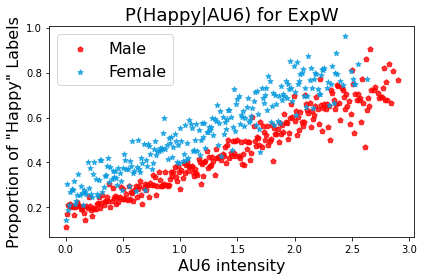

In [17]:
#AU_values_male = list(male_frame.AU06_r.unique())
fig = plt.figure(figsize=(6,4))
ax = fig.gca()

AU_values_male = list(male_frame.AU06_r.value_counts()[male_frame.AU06_r.value_counts() >= 25].index)
happy_proportion_male = []
for AU_value in AU_values_male:
    subframe = male_frame.loc[male_frame.AU06_r == AU_value]
    happy_proportion_male.append(subframe.Happy.mean())
plt.scatter(AU_values_male, happy_proportion_male, label="Male", marker = "p", alpha=0.8, s=30, c='r')#,edgecolors='k')

#AU_values_female = list(female_frame.AU06_r.unique())
AU_values_female = list(female_frame.AU06_r.value_counts()[female_frame.AU06_r.value_counts() >= 25].index)
happy_proportion_female = []
for AU_value in AU_values_female:
    subframe = female_frame.loc[female_frame.AU06_r == AU_value]
    happy_proportion_female.append(subframe.Happy.mean())
plt.scatter(AU_values_female, happy_proportion_female, label="Female", marker = "*", alpha=0.8, s=30, c='#089BDF')#,edgecolors='k')


plt.xlabel('AU6 intensity', fontsize = 16)
plt.ylabel('Proportion of "Happy" Labels', fontsize = 16)
plt.title('P(Happy|AU6) for ExpW', fontsize = 18)
plt.legend(fontsize = 16)
#plt.xlim(-0.1, 3)
plt.tight_layout()
plt.savefig('gender_bias_plots/ExpW_AU6.pdf')  
plt.show()

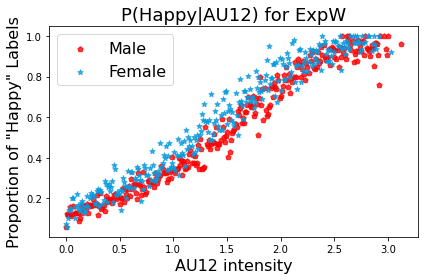

In [18]:
#AU_values_male = list(male_frame.AU06_r.unique())
fig = plt.figure(figsize=(6,4))
ax = fig.gca()

AU_values_male = list(male_frame.AU12_r.value_counts()[male_frame.AU12_r.value_counts() >= 25].index)
happy_proportion_male = []
for AU_value in AU_values_male:
    subframe = male_frame.loc[male_frame.AU12_r == AU_value]
    happy_proportion_male.append(subframe.Happy.mean())
plt.scatter(AU_values_male, happy_proportion_male, label="Male", marker = "p", alpha=0.8, s=30, c='r')#,edgecolors='k')

#AU_values_female = list(female_frame.AU06_r.unique())
AU_values_female = list(female_frame.AU12_r.value_counts()[female_frame.AU12_r.value_counts() >= 25].index)
happy_proportion_female = []
for AU_value in AU_values_female:
    subframe = female_frame.loc[female_frame.AU12_r == AU_value]
    happy_proportion_female.append(subframe.Happy.mean())
plt.scatter(AU_values_female, happy_proportion_female, label="Female", marker = "*", alpha=0.8, s=30, c='#089BDF')#,edgecolors='k')


plt.xlabel('AU12 intensity', fontsize = 16)
plt.ylabel('Proportion of "Happy" Labels', fontsize = 16)
plt.title('P(Happy|AU12) for ExpW', fontsize = 18)
plt.legend(fontsize = 16)
#plt.xlim(-0.1, 3)
plt.tight_layout()
plt.savefig('gender_bias_plots/ExpW_AU12.pdf') 
plt.show()

To formally show that there is a significant difference between the two logistic lines, we need logistic regression:

In [494]:
formula = 'Happy ~ AU06_r + AU12_r + gender_preds'
model = smf.glm(formula = formula, data=frame, family=sm.families.Binomial())
result = model.fit()
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Happy   No. Observations:                85355
Model:                            GLM   Df Residuals:                    85351
Model Family:                Binomial   Df Model:                            3
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -38539.
Date:                Sun, 02 Aug 2020   Deviance:                       77079.
Time:                        14:56:18   Pearson chi2:                 8.35e+04
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -2.1466 

In [495]:
formula = 'Happy ~ (AU06_r + AU12_r) * gender_preds'
model = smf.glm(formula = formula, data=frame, family=sm.families.Binomial())
result = model.fit()
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Happy   No. Observations:                85355
Model:                            GLM   Df Residuals:                    85349
Model Family:                Binomial   Df Model:                            5
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -38530.
Date:                Sun, 02 Aug 2020   Deviance:                       77060.
Time:                        14:56:18   Pearson chi2:                 8.34e+04
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

In [496]:
formula = 'Happy ~ I(AU06_r + AU12_r) * gender_preds'
model = smf.glm(formula = formula, data=frame, family=sm.families.Binomial())
result = model.fit()
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Happy   No. Observations:                85355
Model:                            GLM   Df Residuals:                    85351
Model Family:                Binomial   Df Model:                            3
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -40912.
Date:                Sun, 02 Aug 2020   Deviance:                       81825.
Time:                        14:56:19   Pearson chi2:                 8.36e+04
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

# RAF-DB

In [19]:
frame = pd.read_csv('RAFDB_OpenFace_result_with_Emotion_and_Gender.csv')
print(frame.shape)
frame.head()

(12214, 54)


,ImageName,face,confidence,Emotion,Happy,Gender,AU01_c,AU02_c,AU04_c,AU05_c,...,AU05_r_c,AU06_r_c,AU09_r_c,AU10_r_c,AU12_r_c,AU15_r_c,AU17_r_c,AU20_r_c,AU25_r_c,AU26_r_c
0,test_0001_aligned.jpg,0,0.925,5,0,1.0,1.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,test_0002_aligned.jpg,0,0.975,1,0,1.0,1.0,1.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
2,test_0004_aligned.jpg,0,0.825,1,0,1.0,0.0,1.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,test_0006_aligned.jpg,0,0.875,5,0,1.0,1.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,test_0007_aligned.jpg,0,0.975,3,0,0.0,0.0,0.0,1.0,0.0,...,0,0,0,1,0,1,0,0,0,0


In [20]:
print(list(frame.columns))

['ImageName', 'face', 'confidence', 'Emotion', 'Happy', 'Gender', 'AU01_c', 'AU02_c', 'AU04_c', 'AU05_c', 'AU06_c', 'AU07_c', 'AU09_c', 'AU10_c', 'AU12_c', 'AU14_c', 'AU15_c', 'AU17_c', 'AU20_c', 'AU23_c', 'AU25_c', 'AU26_c', 'AU28_c', 'AU45_c', 'AU01_r', 'AU02_r', 'AU04_r', 'AU05_r', 'AU06_r', 'AU07_r', 'AU09_r', 'AU10_r', 'AU12_r', 'AU14_r', 'AU15_r', 'AU17_r', 'AU20_r', 'AU23_r', 'AU25_r', 'AU26_r', 'AU45_r', 'AU01_r_c', 'AU02_r_c', 'AU04_r_c', 'AU05_r_c', 'AU06_r_c', 'AU09_r_c', 'AU10_r_c', 'AU12_r_c', 'AU15_r_c', 'AU17_r_c', 'AU20_r_c', 'AU25_r_c', 'AU26_r_c']


In [21]:
frame = frame.rename(columns={'Gender': 'gender_preds'})

In [22]:
frame = frame.dropna()
frame.shape

(12214, 54)

In [23]:
frame['AU6and12_c'] = frame.AU06_c.apply(int).apply(str) + frame.AU12_c.apply(int).apply(str)
frame.AU6and12_c.value_counts()

11    6766
00    2619
10    1419
01    1410
Name: AU6and12_c, dtype: int64

In [24]:
frame['AU6and12_r_c'] = frame.AU06_r_c.apply(str) + frame.AU12_r_c.apply(str)
frame.AU6and12_r_c.value_counts()

00    8209
11    1881
01    1545
10     579
Name: AU6and12_r_c, dtype: int64

# P(expression|AU1, male) =? P(expression|AU1, female)

In [25]:
frame.gender_preds = frame.gender_preds.apply(lambda x: 'Male' if x == 0 else 'Female')
male_frame = frame.loc[frame['gender_preds'] == 'Male']
female_frame = frame.loc[frame['gender_preds'] == 'Female']
print(male_frame.shape)
print(female_frame.shape)

(4936, 56)
(7278, 56)


## Happiness

#### First check the simple proportion of male happiness vs female happiness:

In [42]:
print(male_frame.Happy.mean())
print(female_frame.Happy.mean())

0.3602106969205835
0.39914811761472935


In [43]:
print(male_frame.AU06_r_c.mean())
print(female_frame.AU06_r_c.mean())

0.20846839546191248
0.1966199505358615


In [44]:
print(male_frame.AU12_r_c.mean())
print(female_frame.AU12_r_c.mean())

0.26053484602917343
0.29403682330310527


In [45]:
print((male_frame.AU6and12_r_c=='11').mean())
print((female_frame.AU6and12_r_c=='11').mean())

0.1446515397082658
0.16034624896949712


In [46]:
print(1-(male_frame.AU6and12_r_c=='00').mean())
print(1-(female_frame.AU6and12_r_c=='00').mean())

0.32435170178282013
0.33031052486946966


We see that female are more likely to be happy. Not surprising.

#### Now check for conditional probability, controlled by AU:

In [50]:
result_df = pd.concat([pd.crosstab(male_frame.AU06_r_c, male_frame.Happy, normalize = 'index')[1], pd.crosstab(female_frame.AU06_r_c, female_frame.Happy, normalize = 'index')[1]], axis=1)
result_df.columns = ['male', 'female']
result_df['diff'] = result_df.female - result_df.male
for index, row in result_df.iterrows():
    cross_tab = pd.crosstab(frame[frame.AU06_r_c == index].gender_preds, frame[frame.AU06_r_c == index].Happy, margins = True)

    cross_tab.columns = ["Not Happy", "Happy", "row_totals"]
    cross_tab.index = ["Female", "Male", "col_totals"]
    observed = cross_tab.iloc[0:2,0:2]   # Get table without totals for later use

    expected =  np.outer(cross_tab["row_totals"][0:2],
                     cross_tab.loc["col_totals"][0:2]) / len(frame[frame.AU06_r_c == index])

    expected = pd.DataFrame(expected)
    expected.columns = ["Not Happy", "Happy"]
    expected.index = ["Female", "Male"]

    if (expected>=5).sum().sum() == 4:
        chi_squared_stat = (((observed-expected)**2)/expected).sum().sum()
        p_value = 1 - stats.chi2.cdf(x=chi_squared_stat, df=1)
    else:
        chi_squared_stat = np.nan
        p_value = np.nan

    print(chi_squared_stat)
    
    result_df.loc[index, "p-value"] = p_value
result_df

2.8853549353009806
69.69280704584386


,male,female,diff,p-value
AU06_r_c,,,,
0,0.288713,0.304772,0.016059,8.938831e-02
1,0.631681,0.784766,0.153085,1.110223e-16


In [51]:
result_df = pd.concat([pd.crosstab(male_frame.AU12_r_c, male_frame.Happy, normalize = 'index')[1], pd.crosstab(female_frame.AU12_r_c, female_frame.Happy, normalize = 'index')[1]], axis=1)
result_df.columns = ['male', 'female']
result_df['diff'] = result_df.female - result_df.male
for index, row in result_df.iterrows():
    cross_tab = pd.crosstab(frame[frame.AU12_r_c == index].gender_preds, frame[frame.AU12_r_c == index].Happy, margins = True)

    cross_tab.columns = ["Not Happy", "Happy", "row_totals"]
    cross_tab.index = ["Female", "Male", "col_totals"]
    observed = cross_tab.iloc[0:2,0:2]   # Get table without totals for later use

    expected =  np.outer(cross_tab["row_totals"][0:2],
                     cross_tab.loc["col_totals"][0:2]) / len(frame[frame.AU12_r_c == index])

    expected = pd.DataFrame(expected)
    expected.columns = ["Not Happy", "Happy"]
    expected.index = ["Female", "Male"]

    if (expected>=5).sum().sum() == 4:
        chi_squared_stat = (((observed-expected)**2)/expected).sum().sum()
        p_value = 1 - stats.chi2.cdf(x=chi_squared_stat, df=1)
    else:
        chi_squared_stat = np.nan
        p_value = np.nan

    print(chi_squared_stat)
    
    result_df.loc[index, "p-value"] = p_value
result_df

0.3190523532318732
36.803471380214276


,male,female,diff,p-value
AU12_r_c,,,,
0,0.200274,0.195407,-0.004867,5.721777e-01
1,0.814152,0.888318,0.074165,1.306574e-09


In [52]:
result_df = pd.concat([pd.crosstab(male_frame.AU6and12_r_c, male_frame.Happy, normalize = 'index')[1], pd.crosstab(female_frame.AU6and12_r_c, female_frame.Happy, normalize = 'index')[1]], axis=1)
result_df.columns = ['male', 'female']
result_df['diff'] = result_df.female - result_df.male
for index, row in result_df.iterrows():
    cross_tab = pd.crosstab(frame[frame.AU6and12_r_c == index].gender_preds, frame[frame.AU6and12_r_c == index].Happy, margins = True)

    cross_tab.columns = ["Not Happy", "Happy", "row_totals"]
    cross_tab.index = ["Female", "Male", "col_totals"]
    observed = cross_tab.iloc[0:2,0:2]   # Get table without totals for later use

    expected =  np.outer(cross_tab["row_totals"][0:2],
                     cross_tab.loc["col_totals"][0:2]) / len(frame[frame.AU6and12_r_c == index])

    expected = pd.DataFrame(expected)
    expected.columns = ["Not Happy", "Happy"]
    expected.index = ["Female", "Male"]

    if (expected>=5).sum().sum() == 4:
        chi_squared_stat = (((observed-expected)**2)/expected).sum().sum()
        p_value = 1 - stats.chi2.cdf(x=chi_squared_stat, df=1)
    else:
        chi_squared_stat = np.nan
        p_value = np.nan

    print(chi_squared_stat)
    
    result_df.loc[index, "p-value"] = p_value
result_df

0.32344165367471417
6.218911293354303
0.3806242524966086
36.23442028718978


,male,female,diff,p-value
AU6and12_r_c,,,,
00,0.197301,0.192245,-0.005057,5.695466e-01
01,0.821678,0.868448,0.046770,1.263928e-02
10,0.231746,0.253788,0.022042,5.372693e-01
11,0.808123,0.904884,0.096761,1.749531e-09


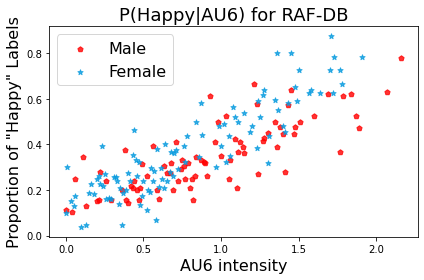

In [26]:
#AU_values_male = list(male_frame.AU06_r.unique())
fig = plt.figure(figsize=(6,4))
ax = fig.gca()

AU_values_male = list(male_frame.AU06_r.value_counts()[male_frame.AU06_r.value_counts() >= 18].index)
happy_proportion_male = []
for AU_value in AU_values_male:
    subframe = male_frame.loc[male_frame.AU06_r == AU_value]
    happy_proportion_male.append(subframe.Happy.mean())
plt.scatter(AU_values_male, happy_proportion_male, label="Male", marker = "p", alpha=0.8, s=30, c='r')#,edgecolors='k')

#AU_values_female = list(female_frame.AU06_r.unique())
AU_values_female = list(female_frame.AU06_r.value_counts()[female_frame.AU06_r.value_counts() >= 22].index)
happy_proportion_female = []
for AU_value in AU_values_female:
    subframe = female_frame.loc[female_frame.AU06_r == AU_value]
    happy_proportion_female.append(subframe.Happy.mean())
plt.scatter(AU_values_female, happy_proportion_female, label="Female", marker = "*", alpha=0.8, s=30, c='#089BDF')#,edgecolors='k')


plt.xlabel('AU6 intensity', fontsize = 16)
plt.ylabel('Proportion of "Happy" Labels', fontsize = 16)
plt.title('P(Happy|AU6) for RAF-DB', fontsize = 18)
plt.legend(fontsize = 16)
#plt.xlim(-0.1, 3)
plt.tight_layout()
plt.savefig('gender_bias_plots/RAFDB_AU6.pdf') 
plt.show()

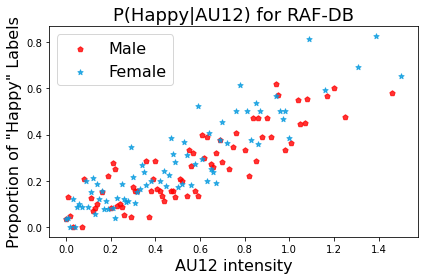

In [27]:
#AU_values_male = list(male_frame.AU06_r.unique())
fig = plt.figure(figsize=(6,4))
ax = fig.gca()

AU_values_male = list(male_frame.AU12_r.value_counts()[male_frame.AU12_r.value_counts() >= 18].index)
happy_proportion_male = []
for AU_value in AU_values_male:
    subframe = male_frame.loc[male_frame.AU12_r == AU_value]
    happy_proportion_male.append(subframe.Happy.mean())
plt.scatter(AU_values_male, happy_proportion_male, label="Male", marker = "p", alpha=0.8, s=30, c='r')#,edgecolors='k')

#AU_values_female = list(female_frame.AU06_r.unique())
AU_values_female = list(female_frame.AU12_r.value_counts()[female_frame.AU12_r.value_counts() >= 22].index)
happy_proportion_female = []
for AU_value in AU_values_female:
    subframe = female_frame.loc[female_frame.AU12_r == AU_value]
    happy_proportion_female.append(subframe.Happy.mean())
plt.scatter(AU_values_female, happy_proportion_female, label="Female", marker = "*", alpha=0.8, s=30, c='#089BDF')#,edgecolors='k')


plt.xlabel('AU12 intensity', fontsize = 16)
plt.ylabel('Proportion of "Happy" Labels', fontsize = 16)
plt.title('P(Happy|AU12) for RAF-DB', fontsize = 18)
plt.legend(fontsize = 16)
#plt.xlim(-0.1, 3)
plt.tight_layout()
plt.savefig('gender_bias_plots/RAFDB_AU12.pdf') 
plt.show()

To formally show that there is a significant difference between the two logistic lines, we need logistic regression:

In [269]:
formula = 'Happy ~ AU06_r + AU12_r + gender_preds'
model = smf.glm(formula = formula, data=frame, family=sm.families.Binomial())
result = model.fit()
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Happy   No. Observations:                12214
Model:                            GLM   Df Residuals:                    12210
Model Family:                Binomial   Df Model:                            3
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4511.3
Date:                Sun, 02 Aug 2020   Deviance:                       9022.6
Time:                        13:31:04   Pearson chi2:                 1.17e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -2.4073 

In [270]:
formula = 'Happy ~ (AU06_r + AU12_r) * gender_preds'
model = smf.glm(formula = formula, data=frame, family=sm.families.Binomial())
result = model.fit()
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Happy   No. Observations:                12214
Model:                            GLM   Df Residuals:                    12208
Model Family:                Binomial   Df Model:                            5
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4502.3
Date:                Sun, 02 Aug 2020   Deviance:                       9004.6
Time:                        13:31:05   Pearson chi2:                 1.17e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

In [271]:
formula = 'Happy ~ I(AU06_r + AU12_r) * gender_preds'
model = smf.glm(formula = formula, data=frame, family=sm.families.Binomial())
result = model.fit()
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Happy   No. Observations:                12214
Model:                            GLM   Df Residuals:                    12210
Model Family:                Binomial   Df Model:                            3
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -5449.3
Date:                Sun, 02 Aug 2020   Deviance:                       10899.
Time:                        13:31:05   Pearson chi2:                 1.15e+04
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

# AffectNet Manual

In [28]:
frame = pd.read_csv('AffectNet_Manual_OpenFace_result_with_expression_gender_race_age.csv')
print(frame.shape)
frame.head()

(35694, 59)


,ImageName,Expression,Happy,race_preds,gender_preds,age_preds,race_scores,gender_scores,age_scores,face,...,AU05_r_c,AU06_r_c,AU09_r_c,AU10_r_c,AU12_r_c,AU15_r_c,AU17_r_c,AU20_r_c,AU25_r_c,AU26_r_c
0,0002074f0d5dafbb7983d509964312d04c612d9d425577...,10,0,White,Female,60-69,[0.425075 0.02112318 0.25978056 0.00382649 0...,[0.09870926 0.9012907 ],[5.3278323e-05 5.1294203e-04 3.1685282e-03 2.4...,0,...,0,0,0,1,0,0,0,0,1,0
1,000bdb0a8f54725d1424bb38d626b1d8bf17f001ad2406...,8,0,Black,Male,20-29,[3.52906886e-06 9.99552011e-01 1.59864125e-04 ...,[9.9954259e-01 4.5739944e-04],[5.6344652e-07 4.1122996e-05 1.3004625e-02 6.6...,0,...,0,1,0,1,1,0,0,0,1,0
2,000c10a8f6735212d71eb54298bc47ea56dc08e64ed2ca...,0,0,White,Male,40-49,[9.3397456e-01 4.9433287e-04 3.7014667e-02 4.5...,[0.99797386 0.00202617],[8.6898144e-05 1.5486187e-04 2.0614783e-03 2.4...,0,...,0,0,0,1,0,0,0,0,0,0
3,000fb19bfc2f4d09e33b30ae5d1be4488297e7ff6f0011...,1,1,White,Male,40-49,[9.3484497e-01 2.3674322e-05 1.4515205e-02 1.9...,[9.9999887e-01 1.1556698e-06],[3.4171117e-06 7.4146001e-06 5.2725355e-04 4.3...,0,...,0,0,0,1,1,0,0,0,0,0
4,0010aaaebcdd6bae8f967dc0e471760f7a45e220125be3...,1,1,Middle Eastern,Male,20-29,[4.4076398e-02 7.8236350e-05 4.0029038e-02 3.7...,[9.9999958e-01 3.9027404e-07],[5.4735474e-06 8.7598469e-03 4.4977888e-01 4.5...,0,...,0,1,0,1,1,0,0,0,1,0


In [29]:
print(list(frame.columns))

['ImageName', 'Expression', 'Happy', 'race_preds', 'gender_preds', 'age_preds', 'race_scores', 'gender_scores', 'age_scores', 'face', 'confidence', 'AU01_c', 'AU02_c', 'AU04_c', 'AU05_c', 'AU06_c', 'AU07_c', 'AU09_c', 'AU10_c', 'AU12_c', 'AU14_c', 'AU15_c', 'AU17_c', 'AU20_c', 'AU23_c', 'AU25_c', 'AU26_c', 'AU28_c', 'AU45_c', 'AU01_r', 'AU02_r', 'AU04_r', 'AU05_r', 'AU06_r', 'AU07_r', 'AU09_r', 'AU10_r', 'AU12_r', 'AU14_r', 'AU15_r', 'AU17_r', 'AU20_r', 'AU23_r', 'AU25_r', 'AU26_r', 'AU45_r', 'AU01_r_c', 'AU02_r_c', 'AU04_r_c', 'AU05_r_c', 'AU06_r_c', 'AU09_r_c', 'AU10_r_c', 'AU12_r_c', 'AU15_r_c', 'AU17_r_c', 'AU20_r_c', 'AU25_r_c', 'AU26_r_c']


In [30]:
frame = frame.dropna()
frame.shape

(35694, 59)

In [31]:
frame['AU6and12_c'] = frame.AU06_c.apply(int).apply(str) + frame.AU12_c.apply(int).apply(str)
frame.AU6and12_c.value_counts()

00    15395
11    12018
10     4277
01     4004
Name: AU6and12_c, dtype: int64

In [32]:
frame['AU6and12_r_c'] = frame.AU06_r_c.apply(str) + frame.AU12_r_c.apply(str)
frame.AU6and12_r_c.value_counts()

00    23289
01     6111
11     5431
10      863
Name: AU6and12_r_c, dtype: int64

# P(expression|AU1, male) =? P(expression|AU1, female)

In [33]:
male_frame = frame.loc[frame['gender_preds'] == 'Male']
female_frame = frame.loc[frame['gender_preds'] == 'Female']
print(male_frame.shape)
print(female_frame.shape)

(19926, 61)
(15768, 61)


## Happiness

#### First check the simple proportion of male happiness vs female happiness:

In [60]:
print(male_frame.Happy.mean())
print(female_frame.Happy.mean())

0.256298303723778
0.3835616438356164


In [61]:
print(male_frame.AU06_r_c.mean())
print(female_frame.AU06_r_c.mean())

0.17891197430492822
0.17307204464738712


In [62]:
print(male_frame.AU12_r_c.mean())
print(female_frame.AU12_r_c.mean())

0.268945096858376
0.3921232876712329


In [63]:
print((male_frame.AU6and12_r_c=='11').mean())
print((female_frame.AU6and12_r_c=='11').mean())

0.1444845929940781
0.16184677828513444


In [64]:
print(1-(male_frame.AU6and12_r_c=='00').mean())
print(1-(female_frame.AU6and12_r_c=='00').mean())

0.3033724781692262
0.4033485540334856


We see that female are more likely to be happy. Not surprising.

#### Now check for conditional probability, controlled by AU:

## New

In [68]:
result_df = pd.concat([pd.crosstab(male_frame.AU06_r_c, male_frame.Happy, normalize = 'index')[1], pd.crosstab(female_frame.AU06_r_c, female_frame.Happy, normalize = 'index')[1]], axis=1)
result_df.columns = ['male', 'female']
result_df['diff'] = result_df.female - result_df.male
for index, row in result_df.iterrows():
    cross_tab = pd.crosstab(frame[frame.AU06_r_c == index].gender_preds, frame[frame.AU06_r_c == index].Happy, margins = True)

    cross_tab.columns = ["Not Happy", "Happy", "row_totals"]
    cross_tab.index = ["Female", "Male", "col_totals"]
    observed = cross_tab.iloc[0:2,0:2]   # Get table without totals for later use

    expected =  np.outer(cross_tab["row_totals"][0:2],
                     cross_tab.loc["col_totals"][0:2]) / len(frame[frame.AU06_r_c == index])

    expected = pd.DataFrame(expected)
    expected.columns = ["Not Happy", "Happy"]
    expected.index = ["Female", "Male"]

    if (expected>=5).sum().sum() == 4:
        chi_squared_stat = (((observed-expected)**2)/expected).sum().sum()
        p_value = 1 - stats.chi2.cdf(x=chi_squared_stat, df=1)
    else:
        chi_squared_stat = np.nan
        p_value = np.nan

    print(chi_squared_stat)
    
    result_df.loc[index, "p-value"] = p_value
result_df

682.14724693928
167.3549912287323


,male,female,diff,p-value
AU06_r_c,,,,
0,0.164782,0.292047,0.127265,0.0
1,0.676297,0.820813,0.144516,0.0


In [69]:
result_df = pd.concat([pd.crosstab(male_frame.AU12_r_c, male_frame.Happy, normalize = 'index')[1], pd.crosstab(female_frame.AU12_r_c, female_frame.Happy, normalize = 'index')[1]], axis=1)
result_df.columns = ['male', 'female']
result_df['diff'] = result_df.female - result_df.male
for index, row in result_df.iterrows():
    cross_tab = pd.crosstab(frame[frame.AU12_r_c == index].gender_preds, frame[frame.AU12_r_c == index].Happy, margins = True)

    cross_tab.columns = ["Not Happy", "Happy", "row_totals"]
    cross_tab.index = ["Female", "Male", "col_totals"]
    observed = cross_tab.iloc[0:2,0:2]   # Get table without totals for later use

    expected =  np.outer(cross_tab["row_totals"][0:2],
                     cross_tab.loc["col_totals"][0:2]) / len(frame[frame.AU12_r_c == index])

    expected = pd.DataFrame(expected)
    expected.columns = ["Not Happy", "Happy"]
    expected.index = ["Female", "Male"]

    if (expected>=5).sum().sum() == 4:
        chi_squared_stat = (((observed-expected)**2)/expected).sum().sum()
        p_value = 1 - stats.chi2.cdf(x=chi_squared_stat, df=1)
    else:
        chi_squared_stat = np.nan
        p_value = np.nan

    print(chi_squared_stat)
    
    result_df.loc[index, "p-value"] = p_value
result_df

69.61649898464273
100.2039476626437


,male,female,diff,p-value
AU12_r_c,,,,
0,0.093293,0.127178,0.033885,1.110223e-16
1,0.699384,0.781012,0.081628,0.000000e+00


In [70]:
result_df = pd.concat([pd.crosstab(male_frame.AU6and12_r_c, male_frame.Happy, normalize = 'index')[1], pd.crosstab(female_frame.AU6and12_r_c, female_frame.Happy, normalize = 'index')[1]], axis=1)
result_df.columns = ['male', 'female']
result_df['diff'] = result_df.female - result_df.male
for index, row in result_df.iterrows():
    cross_tab = pd.crosstab(frame[frame.AU6and12_r_c == index].gender_preds, frame[frame.AU6and12_r_c == index].Happy, margins = True)

    cross_tab.columns = ["Not Happy", "Happy", "row_totals"]
    cross_tab.index = ["Female", "Male", "col_totals"]
    observed = cross_tab.iloc[0:2,0:2]   # Get table without totals for later use

    expected =  np.outer(cross_tab["row_totals"][0:2],
                     cross_tab.loc["col_totals"][0:2]) / len(frame[frame.AU6and12_r_c == index])

    expected = pd.DataFrame(expected)
    expected.columns = ["Not Happy", "Happy"]
    expected.index = ["Female", "Male"]

    if (expected>=5).sum().sum() == 4:
        chi_squared_stat = (((observed-expected)**2)/expected).sum().sum()
        p_value = 1 - stats.chi2.cdf(x=chi_squared_stat, df=1)
    else:
        chi_squared_stat = np.nan
        p_value = np.nan

    print(chi_squared_stat)
    
    result_df.loc[index, "p-value"] = p_value
result_df

94.94544266348461
92.31395715618359
0.009201112907831936
61.30020425886023


,male,female,diff,p-value
AU6and12_r_c,,,,
00,0.085513,0.124787,0.039275,0.000000e+00
01,0.608468,0.725420,0.116952,0.000000e+00
10,0.250729,0.254237,0.003508,9.235822e-01
11,0.777701,0.860110,0.082409,4.884981e-15


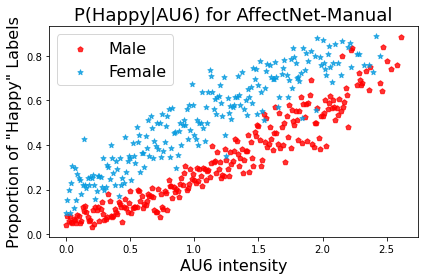

In [34]:
#AU_values_male = list(male_frame.AU06_r.unique())
fig = plt.figure(figsize=(6,4))
ax = fig.gca()

AU_values_male = list(male_frame.AU06_r.value_counts()[male_frame.AU06_r.value_counts() >= 25].index)
happy_proportion_male = []
for AU_value in AU_values_male:
    subframe = male_frame.loc[male_frame.AU06_r == AU_value]
    happy_proportion_male.append(subframe.Happy.mean())
plt.scatter(AU_values_male, happy_proportion_male, label="Male", marker = "p", alpha=0.8, s=30, c='r')#,edgecolors='k')

#AU_values_female = list(female_frame.AU06_r.unique())
AU_values_female = list(female_frame.AU06_r.value_counts()[female_frame.AU06_r.value_counts() >= 25].index)
happy_proportion_female = []
for AU_value in AU_values_female:
    subframe = female_frame.loc[female_frame.AU06_r == AU_value]
    happy_proportion_female.append(subframe.Happy.mean())
plt.scatter(AU_values_female, happy_proportion_female, label="Female", marker = "*", alpha=0.8, s=30, c='#089BDF')#,edgecolors='k')


plt.xlabel('AU6 intensity', fontsize = 16)
plt.ylabel('Proportion of "Happy" Labels', fontsize = 16)
plt.title('P(Happy|AU6) for AffectNet-Manual', fontsize = 18)
plt.legend(fontsize = 16)
#plt.xlim(-0.1, 3)
plt.tight_layout()
plt.savefig('gender_bias_plots/AffectNet_Manual_AU6.pdf') 
plt.show()

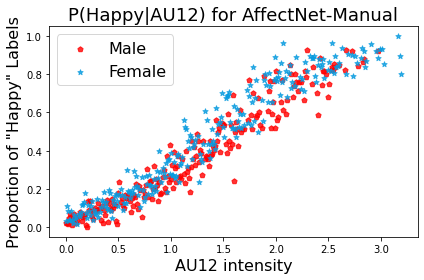

In [35]:
#AU_values_male = list(male_frame.AU06_r.unique())
fig = plt.figure(figsize=(6,4))
ax = fig.gca()

AU_values_male = list(male_frame.AU12_r.value_counts()[male_frame.AU12_r.value_counts() >= 25].index)
happy_proportion_male = []
for AU_value in AU_values_male:
    subframe = male_frame.loc[male_frame.AU12_r == AU_value]
    happy_proportion_male.append(subframe.Happy.mean())
plt.scatter(AU_values_male, happy_proportion_male, label="Male", marker = "p", alpha=0.8, s=30, c='r')#,edgecolors='k')

#AU_values_female = list(female_frame.AU06_r.unique())
AU_values_female = list(female_frame.AU12_r.value_counts()[female_frame.AU12_r.value_counts() >= 25].index)
happy_proportion_female = []
for AU_value in AU_values_female:
    subframe = female_frame.loc[female_frame.AU12_r == AU_value]
    happy_proportion_female.append(subframe.Happy.mean())
plt.scatter(AU_values_female, happy_proportion_female, label="Female", marker = "*", alpha=0.8, s=30, c='#089BDF')#,edgecolors='k')


plt.xlabel('AU12 intensity', fontsize = 16)
plt.ylabel('Proportion of "Happy" Labels', fontsize = 16)
plt.title('P(Happy|AU12) for AffectNet-Manual', fontsize = 18)
plt.legend(fontsize = 16)
#plt.xlim(-0.1, 3)
plt.tight_layout()
plt.savefig('gender_bias_plots/AffectNet_Manual_AU12.pdf') 
plt.show()

To formally show that there is a significant difference between the two logistic lines, we need logistic regression:

In [527]:
formula = 'Happy ~ AU06_r + AU12_r + gender_preds'
model = smf.glm(formula = formula, data=frame, family=sm.families.Binomial())
result = model.fit()
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Happy   No. Observations:                35694
Model:                            GLM   Df Residuals:                    35690
Model Family:                Binomial   Df Model:                            3
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -12864.
Date:                Sun, 02 Aug 2020   Deviance:                       25727.
Time:                        15:15:43   Pearson chi2:                 3.64e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -2.7753 

In [528]:
formula = 'Happy ~ (AU06_r + AU12_r) * gender_preds'
model = smf.glm(formula = formula, data=frame, family=sm.families.Binomial())
result = model.fit()
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Happy   No. Observations:                35694
Model:                            GLM   Df Residuals:                    35688
Model Family:                Binomial   Df Model:                            5
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -12850.
Date:                Sun, 02 Aug 2020   Deviance:                       25699.
Time:                        15:15:43   Pearson chi2:                 3.63e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

In [529]:
formula = 'Happy ~ I(AU06_r + AU12_r) * gender_preds'
model = smf.glm(formula = formula, data=frame, family=sm.families.Binomial())
result = model.fit()
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Happy   No. Observations:                35694
Model:                            GLM   Df Residuals:                    35690
Model Family:                Binomial   Df Model:                            3
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13548.
Date:                Sun, 02 Aug 2020   Deviance:                       27096.
Time:                        15:15:45   Pearson chi2:                 3.68e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

# AffectNet Automatic

In [36]:
frame = pd.read_csv('AffectNet_Automatic_OpenFace_result_with_expression_gender_race_age.csv')
print(frame.shape)
frame.head()

(42284, 59)


,ImageName,Expression,Happy,race_preds,gender_preds,age_preds,race_scores,gender_scores,age_scores,face,...,AU05_r_c,AU06_r_c,AU09_r_c,AU10_r_c,AU12_r_c,AU15_r_c,AU17_r_c,AU20_r_c,AU25_r_c,AU26_r_c
0,0000278c7363d43c42a4db994a51e36aad351f55e77680...,10,0,White,Female,40-49,[9.7449505e-01 5.2814976e-06 5.5093807e-03 4.6...,[7.1670633e-04 9.9928331e-01],[2.2580596e-07 1.7767234e-06 2.0319392e-04 2.8...,0,...,0,0,0,1,0,0,0,0,1,0
1,0000fa4e4ffdc2a6042a0eadf8a2d067774705ba17721a...,10,0,East Asian,Female,20-29,[1.9185199e-01 7.3396941e-06 1.9742842e-03 7.8...,[6.5521155e-05 9.9993443e-01],[1.48235313e-06 3.44420609e-04 2.11575143e-02 ...,0,...,0,0,0,0,0,0,0,0,1,0
2,00017248a05758584faf54d4ccdb23d5365a5bfc3e3aee...,0,0,Black,Female,30-39,[2.06290515e-05 9.99178529e-01 1.19858145e-04 ...,[0.00982992 0.9901701 ],[1.80382315e-07 2.75580824e-05 3.95781221e-03 ...,0,...,0,0,0,0,0,0,0,0,0,0
3,000364dc26143c95e73e8dca30c0f3730db84c295c0b48...,1,1,East Asian,Female,20-29,[9.0016201e-03 2.3799853e-06 2.5050717e-03 9.5...,[6.7393144e-06 9.9999321e-01],[1.0476051e-07 6.7055156e-04 1.7963018e-01 8.1...,0,...,0,0,0,0,1,0,0,0,0,0
4,0003a7c1e380e87c864436434115f656c92b695e384f88...,10,0,White,Female,20-29,[0.60690844 0.01389638 0.2529639 0.00064708 0...,[0.00108382 0.9989162 ],[9.6977169e-07 3.5300865e-04 4.1254394e-02 6.1...,0,...,0,0,0,1,0,1,0,0,0,0


In [37]:
print(list(frame.columns))

['ImageName', 'Expression', 'Happy', 'race_preds', 'gender_preds', 'age_preds', 'race_scores', 'gender_scores', 'age_scores', 'face', 'confidence', 'AU01_c', 'AU02_c', 'AU04_c', 'AU05_c', 'AU06_c', 'AU07_c', 'AU09_c', 'AU10_c', 'AU12_c', 'AU14_c', 'AU15_c', 'AU17_c', 'AU20_c', 'AU23_c', 'AU25_c', 'AU26_c', 'AU28_c', 'AU45_c', 'AU01_r', 'AU02_r', 'AU04_r', 'AU05_r', 'AU06_r', 'AU07_r', 'AU09_r', 'AU10_r', 'AU12_r', 'AU14_r', 'AU15_r', 'AU17_r', 'AU20_r', 'AU23_r', 'AU25_r', 'AU26_r', 'AU45_r', 'AU01_r_c', 'AU02_r_c', 'AU04_r_c', 'AU05_r_c', 'AU06_r_c', 'AU09_r_c', 'AU10_r_c', 'AU12_r_c', 'AU15_r_c', 'AU17_r_c', 'AU20_r_c', 'AU25_r_c', 'AU26_r_c']


In [38]:
frame = frame.dropna()
frame.shape

(42284, 59)

In [39]:
frame['AU6and12_c'] = frame.AU06_c.apply(int).apply(str) + frame.AU12_c.apply(int).apply(str)
frame.AU6and12_c.value_counts()

00    18398
11    14291
01     5093
10     4502
Name: AU6and12_c, dtype: int64

In [40]:
frame['AU6and12_r_c'] = frame.AU06_r_c.apply(str) + frame.AU12_r_c.apply(str)
frame.AU6and12_r_c.value_counts()

00    27828
01     7198
11     6392
10      866
Name: AU6and12_r_c, dtype: int64

# P(expression|AU1, male) =? P(expression|AU1, female)

In [41]:
male_frame = frame.loc[frame['gender_preds'] == 'Male']
female_frame = frame.loc[frame['gender_preds'] == 'Female']
print(male_frame.shape)
print(female_frame.shape)

(22062, 61)
(20222, 61)


## Happiness

#### First check the simple proportion of male happiness vs female happiness:

In [78]:
print(male_frame.Happy.mean())
print(female_frame.Happy.mean())

0.33954310579276586
0.5007417663930372


In [79]:
print(male_frame.AU06_r_c.mean())
print(female_frame.AU06_r_c.mean())

0.16249660048952952
0.1816338641083968


In [80]:
print(male_frame.AU12_r_c.mean())
print(female_frame.AU12_r_c.mean())

0.254238056386547
0.3946691721887054


In [81]:
print((male_frame.AU6and12_r_c=='11').mean())
print((female_frame.AU6and12_r_c=='11').mean())

0.13357809808720877
0.17035901493423006


In [82]:
print(1-(male_frame.AU6and12_r_c=='00').mean())
print(1-(female_frame.AU6and12_r_c=='00').mean())

0.2831565587888677
0.4059440213628721


We see that female are more likely to be happy. Not surprising.

#### Now check for conditional probability, controlled by AU:

In [86]:
result_df = pd.concat([pd.crosstab(male_frame.AU06_r_c, male_frame.Happy, normalize = 'index')[1], pd.crosstab(female_frame.AU06_r_c, female_frame.Happy, normalize = 'index')[1]], axis=1)
result_df.columns = ['male', 'female']
result_df['diff'] = result_df.female - result_df.male
for index, row in result_df.iterrows():
    cross_tab = pd.crosstab(frame[frame.AU06_r_c == index].gender_preds, frame[frame.AU06_r_c == index].Happy, margins = True)

    cross_tab.columns = ["Not Happy", "Happy", "row_totals"]
    cross_tab.index = ["Female", "Male", "col_totals"]
    observed = cross_tab.iloc[0:2,0:2]   # Get table without totals for later use

    expected =  np.outer(cross_tab["row_totals"][0:2],
                     cross_tab.loc["col_totals"][0:2]) / len(frame[frame.AU06_r_c == index])

    expected = pd.DataFrame(expected)
    expected.columns = ["Not Happy", "Happy"]
    expected.index = ["Female", "Male"]

    if (expected>=5).sum().sum() == 4:
        chi_squared_stat = (((observed-expected)**2)/expected).sum().sum()
        p_value = 1 - stats.chi2.cdf(x=chi_squared_stat, df=1)
    else:
        chi_squared_stat = np.nan
        p_value = np.nan

    print(chi_squared_stat)
    
    result_df.loc[index, "p-value"] = p_value
result_df

1078.3414798458045
115.30916993595885


,male,female,diff,p-value
AU06_r_c,,,,
0,0.245873,0.410297,0.164423,0.0
1,0.822315,0.908249,0.085934,0.0


In [87]:
result_df = pd.concat([pd.crosstab(male_frame.AU12_r_c, male_frame.Happy, normalize = 'index')[1], pd.crosstab(female_frame.AU12_r_c, female_frame.Happy, normalize = 'index')[1]], axis=1)
result_df.columns = ['male', 'female']
result_df['diff'] = result_df.female - result_df.male
for index, row in result_df.iterrows():
    cross_tab = pd.crosstab(frame[frame.AU12_r_c == index].gender_preds, frame[frame.AU12_r_c == index].Happy, margins = True)

    cross_tab.columns = ["Not Happy", "Happy", "row_totals"]
    cross_tab.index = ["Female", "Male", "col_totals"]
    observed = cross_tab.iloc[0:2,0:2]   # Get table without totals for later use

    expected =  np.outer(cross_tab["row_totals"][0:2],
                     cross_tab.loc["col_totals"][0:2]) / len(frame[frame.AU12_r_c == index])

    expected = pd.DataFrame(expected)
    expected.columns = ["Not Happy", "Happy"]
    expected.index = ["Female", "Male"]

    if (expected>=5).sum().sum() == 4:
        chi_squared_stat = (((observed-expected)**2)/expected).sum().sum()
        p_value = 1 - stats.chi2.cdf(x=chi_squared_stat, df=1)
    else:
        chi_squared_stat = np.nan
        p_value = np.nan

    print(chi_squared_stat)
    
    result_df.loc[index, "p-value"] = p_value
result_df

280.77127409974315
45.832573988133916


,male,female,diff,p-value
AU12_r_c,,,,
0,0.161673,0.240993,0.079321,0.000000e+00
1,0.861294,0.899135,0.037841,1.288036e-11


In [88]:
result_df = pd.concat([pd.crosstab(male_frame.AU6and12_r_c, male_frame.Happy, normalize = 'index')[1], pd.crosstab(female_frame.AU6and12_r_c, female_frame.Happy, normalize = 'index')[1]], axis=1)
result_df.columns = ['male', 'female']
result_df['diff'] = result_df.female - result_df.male
for index, row in result_df.iterrows():
    cross_tab = pd.crosstab(frame[frame.AU6and12_r_c == index].gender_preds, frame[frame.AU6and12_r_c == index].Happy, margins = True)

    cross_tab.columns = ["Not Happy", "Happy", "row_totals"]
    cross_tab.index = ["Female", "Male", "col_totals"]
    observed = cross_tab.iloc[0:2,0:2]   # Get table without totals for later use

    expected =  np.outer(cross_tab["row_totals"][0:2],
                     cross_tab.loc["col_totals"][0:2]) / len(frame[frame.AU6and12_r_c == index])

    expected = pd.DataFrame(expected)
    expected.columns = ["Not Happy", "Happy"]
    expected.index = ["Female", "Male"]

    if (expected>=5).sum().sum() == 4:
        chi_squared_stat = (((observed-expected)**2)/expected).sum().sum()
        p_value = 1 - stats.chi2.cdf(x=chi_squared_stat, df=1)
    else:
        chi_squared_stat = np.nan
        p_value = np.nan

    print(chi_squared_stat)
    
    result_df.loc[index, "p-value"] = p_value
result_df

323.3481269647484
50.33472470360058
5.071612860105805
16.12808682668661


,male,female,diff,p-value
AU6and12_r_c,,,,
00,0.150806,0.235745,0.084938,0.000000e+00
01,0.810669,0.872575,0.061906,1.296407e-12
10,0.431034,0.517544,0.086509,2.432074e-02
11,0.907024,0.934107,0.027083,5.919954e-05


In [89]:
result_df['diff'].mean()

0.06510934642943594

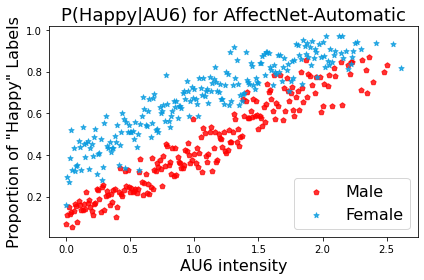

In [42]:
#AU_values_male = list(male_frame.AU06_r.unique())
fig = plt.figure(figsize=(6,4))
ax = fig.gca()

AU_values_male = list(male_frame.AU06_r.value_counts()[male_frame.AU06_r.value_counts() >= 30].index)
happy_proportion_male = []
for AU_value in AU_values_male:
    subframe = male_frame.loc[male_frame.AU06_r == AU_value]
    happy_proportion_male.append(subframe.Happy.mean())
plt.scatter(AU_values_male, happy_proportion_male, label="Male", marker = "p", alpha=0.8, s=30, c='r')#,edgecolors='k')

#AU_values_female = list(female_frame.AU06_r.unique())
AU_values_female = list(female_frame.AU06_r.value_counts()[female_frame.AU06_r.value_counts() >= 30].index)
happy_proportion_female = []
for AU_value in AU_values_female:
    subframe = female_frame.loc[female_frame.AU06_r == AU_value]
    happy_proportion_female.append(subframe.Happy.mean())
plt.scatter(AU_values_female, happy_proportion_female, label="Female", marker = "*", alpha=0.8, s=30, c='#089BDF')#,edgecolors='k')


plt.xlabel('AU6 intensity', fontsize = 16)
plt.ylabel('Proportion of "Happy" Labels', fontsize = 16)
plt.title('P(Happy|AU6) for AffectNet-Automatic', fontsize = 18)
plt.legend(fontsize = 16)
#plt.xlim(-0.1, 3)
plt.tight_layout()
plt.savefig('gender_bias_plots/AffectNet_Automatic_AU6.pdf') 
plt.show()

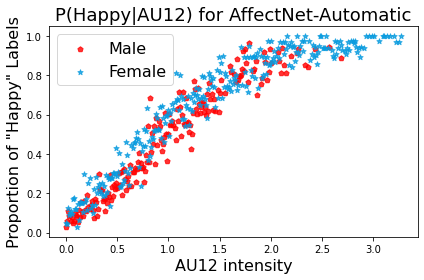

In [43]:
#AU_values_male = list(male_frame.AU06_r.unique())
fig = plt.figure(figsize=(6,4))
ax = fig.gca()

AU_values_male = list(male_frame.AU12_r.value_counts()[male_frame.AU12_r.value_counts() >= 30].index)
happy_proportion_male = []
for AU_value in AU_values_male:
    subframe = male_frame.loc[male_frame.AU12_r == AU_value]
    happy_proportion_male.append(subframe.Happy.mean())
plt.scatter(AU_values_male, happy_proportion_male, label="Male", marker = "p", alpha=0.8, s=30, c='r')#,edgecolors='k')

#AU_values_female = list(female_frame.AU06_r.unique())
AU_values_female = list(female_frame.AU12_r.value_counts()[female_frame.AU12_r.value_counts() >= 30].index)
happy_proportion_female = []
for AU_value in AU_values_female:
    subframe = female_frame.loc[female_frame.AU12_r == AU_value]
    happy_proportion_female.append(subframe.Happy.mean())
plt.scatter(AU_values_female, happy_proportion_female, label="Female", marker = "*", alpha=0.8, s=30, c='#089BDF')#,edgecolors='k')


plt.xlabel('AU12 intensity', fontsize = 16)
plt.ylabel('Proportion of "Happy" Labels', fontsize = 16)
plt.title('P(Happy|AU12) for AffectNet-Automatic', fontsize = 18)
plt.legend(fontsize = 16)
#plt.xlim(-0.1, 3)
plt.tight_layout()
plt.savefig('gender_bias_plots/AffectNet_Automatic_AU12.pdf') 
plt.show()

To formally show that there is a significant difference between the two logistic lines, we need logistic regression:

In [313]:
formula = 'Happy ~ AU06_r + AU12_r + gender_preds'
model = smf.glm(formula = formula, data=frame, family=sm.families.Binomial())
result = model.fit()
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Happy   No. Observations:                42284
Model:                            GLM   Df Residuals:                    42280
Model Family:                Binomial   Df Model:                            3
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15466.
Date:                Sun, 02 Aug 2020   Deviance:                       30933.
Time:                        13:32:39   Pearson chi2:                 7.16e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -2.2580 

In [314]:
formula = 'Happy ~ (AU06_r + AU12_r) * gender_preds'
model = smf.glm(formula = formula, data=frame, family=sm.families.Binomial())
result = model.fit()
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Happy   No. Observations:                42284
Model:                            GLM   Df Residuals:                    42278
Model Family:                Binomial   Df Model:                            5
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15436.
Date:                Sun, 02 Aug 2020   Deviance:                       30872.
Time:                        13:32:39   Pearson chi2:                 6.96e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

In [315]:
formula = 'Happy ~ I(AU06_r + AU12_r) * gender_preds'
model = smf.glm(formula = formula, data=frame, family=sm.families.Binomial())
result = model.fit()
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Happy   No. Observations:                42284
Model:                            GLM   Df Residuals:                    42280
Model Family:                Binomial   Df Model:                            3
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -16636.
Date:                Sun, 02 Aug 2020   Deviance:                       33272.
Time:                        13:32:39   Pearson chi2:                 5.97e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

# KDEF

In [172]:
frame = pd.read_csv('KDEF_OpenFace_result_with_Emotion_and_Gender.csv')
print(frame.shape)
frame.head()

(2926, 54)


,ImageName,face,confidence,AU01_c,AU02_c,AU04_c,AU05_c,AU06_c,AU07_c,AU09_c,...,AU10_r_c,AU12_r_c,AU15_r_c,AU17_r_c,AU20_r_c,AU25_r_c,AU26_r_c,Emotion,Happy,Gender
0,AF01AFHL.jpg,0,0.475,1.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0,0,1,0,0,0,0,AF,0,F
1,AF01AFHR.jpg,0,0.975,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1,1,0,0,0,1,0,AF,0,F
2,AF01AFS.jpg,0,0.975,1.0,0.0,0.0,1.0,1.0,1.0,0.0,...,1,1,0,0,0,1,0,AF,0,F
3,AF01ANHL.jpg,0,0.425,1.0,1.0,0.0,1.0,1.0,1.0,0.0,...,0,0,0,0,0,0,0,AN,0,F
4,AF01ANHR.jpg,0,0.575,0.0,0.0,0.0,1.0,1.0,1.0,0.0,...,1,0,0,0,0,1,0,AN,0,F


In [173]:
frame = frame[frame.ImageName.apply(lambda x: x[6] == 'S')]
frame.shape

(974, 54)

In [174]:
print(list(frame.columns))

['ImageName', 'face', 'confidence', 'AU01_c', 'AU02_c', 'AU04_c', 'AU05_c', 'AU06_c', 'AU07_c', 'AU09_c', 'AU10_c', 'AU12_c', 'AU14_c', 'AU15_c', 'AU17_c', 'AU20_c', 'AU23_c', 'AU25_c', 'AU26_c', 'AU28_c', 'AU45_c', 'AU01_r', 'AU02_r', 'AU04_r', 'AU05_r', 'AU06_r', 'AU07_r', 'AU09_r', 'AU10_r', 'AU12_r', 'AU14_r', 'AU15_r', 'AU17_r', 'AU20_r', 'AU23_r', 'AU25_r', 'AU26_r', 'AU45_r', 'AU01_r_c', 'AU02_r_c', 'AU04_r_c', 'AU05_r_c', 'AU06_r_c', 'AU09_r_c', 'AU10_r_c', 'AU12_r_c', 'AU15_r_c', 'AU17_r_c', 'AU20_r_c', 'AU25_r_c', 'AU26_r_c', 'Emotion', 'Happy', 'Gender']


In [175]:
frame = frame.rename(columns={'Gender': 'gender_preds'})

In [176]:
frame = frame.dropna()
frame.shape

(974, 54)

In [177]:
frame['AU6and12_c'] = frame.AU06_c.apply(int).apply(str) + frame.AU12_c.apply(int).apply(str)
frame.AU6and12_c.value_counts()

00    541
11    191
10    188
01     54
Name: AU6and12_c, dtype: int64

In [178]:
frame['AU6and12_r_c'] = frame.AU06_r_c.apply(str) + frame.AU12_r_c.apply(str)
frame.AU6and12_r_c.value_counts()

00    696
11    151
10     86
01     41
Name: AU6and12_r_c, dtype: int64

# P(expression|AU1, male) =? P(expression|AU1, female)

In [179]:
frame.gender_preds = frame.gender_preds.apply(lambda x: 'Male' if x == 'M' else 'Female')
male_frame = frame.loc[frame['gender_preds'] == 'Male']
female_frame = frame.loc[frame['gender_preds'] == 'Female']
print(male_frame.shape)
print(female_frame.shape)

(485, 56)
(489, 56)


## Happiness

#### First check the simple proportion of male happiness vs female happiness:

In [180]:
print(male_frame.Happy.mean())
print(female_frame.Happy.mean())

0.14432989690721648
0.14314928425357873


In [181]:
print(male_frame.AU06_r_c.mean())
print(female_frame.AU06_r_c.mean())

0.24742268041237114
0.2392638036809816


In [182]:
print(male_frame.AU12_r_c.mean())
print(female_frame.AU12_r_c.mean())

0.18762886597938144
0.2065439672801636


In [183]:
print((male_frame.AU6and12_r_c=='11').mean())
print((female_frame.AU6and12_r_c=='11').mean())

0.1402061855670103
0.16973415132924335


In [184]:
print(1-(male_frame.AU6and12_r_c=='00').mean())
print(1-(female_frame.AU6and12_r_c=='00').mean())

0.2948453608247422
0.2760736196319018


We see that female are more likely to be happy. Not surprising.

#### Now check for conditional probability, controlled by AU:

In [188]:
result_df = pd.concat([pd.crosstab(male_frame.AU06_r_c, male_frame.Happy, normalize = 'index')[1], pd.crosstab(female_frame.AU06_r_c, female_frame.Happy, normalize = 'index')[1]], axis=1)
result_df.columns = ['male', 'female']
result_df['diff'] = result_df.female - result_df.male
for index, row in result_df.iterrows():
    cross_tab = pd.crosstab(frame[frame.AU06_r_c == index].gender_preds, frame[frame.AU06_r_c == index].Happy, margins = True)

    cross_tab.columns = ["Not Happy", "Happy", "row_totals"]
    cross_tab.index = ["Female", "Male", "col_totals"]
    observed = cross_tab.iloc[0:2,0:2]   # Get table without totals for later use

    expected =  np.outer(cross_tab["row_totals"][0:2],
                     cross_tab.loc["col_totals"][0:2]) / len(frame[frame.AU06_r_c == index])

    expected = pd.DataFrame(expected)
    expected.columns = ["Not Happy", "Happy"]
    expected.index = ["Female", "Male"]

    if (expected>=5).sum().sum() == 4:
        chi_squared_stat = (((observed-expected)**2)/expected).sum().sum()
        p_value = 1 - stats.chi2.cdf(x=chi_squared_stat, df=1)
    else:
        chi_squared_stat = np.nan
        p_value = np.nan

    print(chi_squared_stat)
    
    result_df.loc[index, "p-value"] = p_value
result_df

2.785693417879838
1.2292499232742176


,male,female,diff,p-value
AU06_r_c,,,,
0,0.035616,0.016129,-0.019487,0.095110
1,0.475000,0.547009,0.072009,0.267553


In [189]:
result_df = pd.concat([pd.crosstab(male_frame.AU12_r_c, male_frame.Happy, normalize = 'index')[1], pd.crosstab(female_frame.AU12_r_c, female_frame.Happy, normalize = 'index')[1]], axis=1)
result_df.columns = ['male', 'female']
result_df['diff'] = result_df.female - result_df.male
for index, row in result_df.iterrows():
    cross_tab = pd.crosstab(frame[frame.AU12_r_c == index].gender_preds, frame[frame.AU12_r_c == index].Happy, margins = True)

    cross_tab.columns = ["Not Happy", "Happy", "row_totals"]
    cross_tab.index = ["Female", "Male", "col_totals"]
    observed = cross_tab.iloc[0:2,0:2]   # Get table without totals for later use

    expected =  np.outer(cross_tab["row_totals"][0:2],
                     cross_tab.loc["col_totals"][0:2]) / len(frame[frame.AU12_r_c == index])

    expected = pd.DataFrame(expected)
    expected.columns = ["Not Happy", "Happy"]
    expected.index = ["Female", "Male"]

    if (expected>=5).sum().sum() == 4:
        chi_squared_stat = (((observed-expected)**2)/expected).sum().sum()
        p_value = 1 - stats.chi2.cdf(x=chi_squared_stat, df=1)
    else:
        chi_squared_stat = np.nan
        p_value = np.nan

    print(chi_squared_stat)
    
    result_df.loc[index, "p-value"] = p_value
result_df

nan
2.180734461406007


,male,female,diff,p-value
AU12_r_c,,,,
0,0.000000,0.005155,0.005155,NaN
1,0.769231,0.673267,-0.095963,0.139748


In [190]:
result_df = pd.concat([pd.crosstab(male_frame.AU6and12_r_c, male_frame.Happy, normalize = 'index')[1], pd.crosstab(female_frame.AU6and12_r_c, female_frame.Happy, normalize = 'index')[1]], axis=1)
result_df.columns = ['male', 'female']
result_df['diff'] = result_df.female - result_df.male
for index, row in result_df.iterrows():
    cross_tab = pd.crosstab(frame[frame.AU6and12_r_c == index].gender_preds, frame[frame.AU6and12_r_c == index].Happy, margins = True)
    if cross_tab.shape[1] < 3: 
        result_df.loc[index, "p-value"] = np.nan
        continue
    cross_tab.columns = ["Not Happy", "Happy", "row_totals"]
    cross_tab.index = ["Female", "Male", "col_totals"]
    observed = cross_tab.iloc[0:2,0:2]   # Get table without totals for later use

    expected =  np.outer(cross_tab["row_totals"][0:2],
                     cross_tab.loc["col_totals"][0:2]) / len(frame[frame.AU6and12_r_c == index])

    expected = pd.DataFrame(expected)
    expected.columns = ["Not Happy", "Happy"]
    expected.index = ["Female", "Male"]

    if (expected>=8).sum().sum() == 4:
        chi_squared_stat = (((observed-expected)**2)/expected).sum().sum()
        p_value = 1 - stats.chi2.cdf(x=chi_squared_stat, df=1)
    else:
        chi_squared_stat = np.nan
        p_value = np.nan

    print(chi_squared_stat)
    
    result_df.loc[index, "p-value"] = p_value
result_df

nan
nan
1.0586727561680846


,male,female,diff,p-value
AU6and12_r_c,,,,
00,0.000000,0.005650,0.005650,NaN
01,0.565217,0.222222,-0.342995,NaN
10,0.000000,0.000000,0.000000,NaN
11,0.838235,0.771084,-0.067151,0.303518


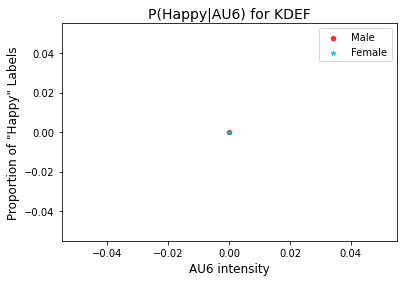

In [192]:
#AU_values_male = list(male_frame.AU06_r.unique())
AU_values_male = list(male_frame.AU06_r.value_counts()[male_frame.AU06_r.value_counts() >= 10].index)
happy_proportion_male = []
for AU_value in AU_values_male:
    subframe = male_frame.loc[male_frame.AU06_r == AU_value]
    happy_proportion_male.append(subframe.Happy.mean())
plt.scatter(AU_values_male, happy_proportion_male, label="Male", marker = "p", alpha=0.8, s=25, c='r')#,edgecolors='k')

#AU_values_female = list(female_frame.AU06_r.unique())
AU_values_female = list(female_frame.AU06_r.value_counts()[female_frame.AU06_r.value_counts() >= 10].index)
happy_proportion_female = []
for AU_value in AU_values_female:
    subframe = female_frame.loc[female_frame.AU06_r == AU_value]
    happy_proportion_female.append(subframe.Happy.mean())
plt.scatter(AU_values_female, happy_proportion_female, label="Female", marker = "*", alpha=0.8, s=25, c='c')#,edgecolors='k')


plt.xlabel('AU6 intensity', fontsize = 'large')
plt.ylabel('Proportion of "Happy" Labels', fontsize = 'large')
plt.title('P(Happy|AU6) for KDEF', fontsize = 14)
plt.legend()
#plt.xlim(-0.1, 3)
plt.show()

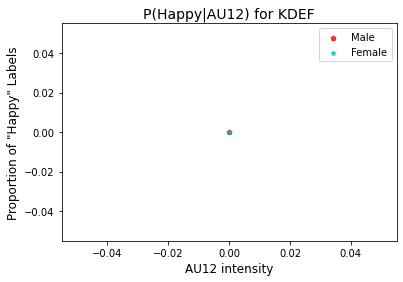

In [195]:
#AU_values_male = list(male_frame.AU06_r.unique())
AU_values_male = list(male_frame.AU12_r.value_counts()[male_frame.AU12_r.value_counts() >= 10].index)
happy_proportion_male = []
for AU_value in AU_values_male:
    subframe = male_frame.loc[male_frame.AU12_r == AU_value]
    happy_proportion_male.append(subframe.Happy.mean())
plt.scatter(AU_values_male, happy_proportion_male, label="Male", marker = "p", alpha=0.8, s=25, c='r')#,edgecolors='k')

#AU_values_female = list(female_frame.AU06_r.unique())
AU_values_female = list(female_frame.AU12_r.value_counts()[female_frame.AU12_r.value_counts() >= 10].index)
happy_proportion_female = []
for AU_value in AU_values_female:
    subframe = female_frame.loc[female_frame.AU12_r == AU_value]
    happy_proportion_female.append(subframe.Happy.mean())
plt.scatter(AU_values_female, happy_proportion_female, label="Female", marker = "*", alpha=0.8, s=25, c='c')#,edgecolors='k')


plt.xlabel('AU12 intensity', fontsize = 'large')
plt.ylabel('Proportion of "Happy" Labels', fontsize = 'large')
plt.title('P(Happy|AU12) for KDEF', fontsize = 14)
plt.legend()
#plt.xlim(-0.1, 3)
plt.show()

To formally show that there is a significant difference between the two logistic lines, we need logistic regression:

In [196]:
formula = 'Happy ~ AU06_r + AU12_r + gender_preds'
model = smf.glm(formula = formula, data=frame, family=sm.families.Binomial())
result = model.fit()
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Happy   No. Observations:                  974
Model:                            GLM   Df Residuals:                      970
Model Family:                Binomial   Df Model:                            3
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -36.646
Date:                Sun, 02 Aug 2020   Deviance:                       73.292
Time:                        12:46:10   Pearson chi2:                 1.15e+03
No. Iterations:                    10                                         
Covariance Type:            nonrobust                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -9.4043 

In [197]:
formula = 'Happy ~ (AU06_r + AU12_r) * gender_preds'
model = smf.glm(formula = formula, data=frame, family=sm.families.Binomial())
result = model.fit()
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Happy   No. Observations:                  974
Model:                            GLM   Df Residuals:                      968
Model Family:                Binomial   Df Model:                            5
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -34.196
Date:                Sun, 02 Aug 2020   Deviance:                       68.393
Time:                        12:46:10   Pearson chi2:                     551.
No. Iterations:                    11                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

In [198]:
formula = 'Happy ~ I(AU06_r + AU12_r) * gender_preds'
model = smf.glm(formula = formula, data=frame, family=sm.families.Binomial())
result = model.fit()
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Happy   No. Observations:                  974
Model:                            GLM   Df Residuals:                      970
Model Family:                Binomial   Df Model:                            3
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -76.081
Date:                Sun, 02 Aug 2020   Deviance:                       152.16
Time:                        12:46:10   Pearson chi2:                     605.
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

# Chicago Face

In [199]:
frame = pd.read_csv('ChicagoFace_with_AU_cleanedup.csv')
print(frame.shape)
frame.head()

(1207, 54)


,ImageName,Gender,Race,Expression,face,confidence,AU01_r,AU02_r,AU04_r,AU05_r,...,AU05_r_c,AU06_r_c,AU09_r_c,AU10_r_c,AU12_r_c,AU15_r_c,AU17_r_c,AU20_r_c,AU25_r_c,AU26_r_c
0,CFD-WM-239-128-N.jpg,M,W,Neutral,0,0.975,0.00,0.00,0.49,0.00,...,0,0,0,1,0,0,0,0,1,0
1,CFD-BM-219-141-N.jpg,M,B,Neutral,0,0.975,1.69,1.28,0.00,0.36,...,0,0,0,0,0,1,0,0,1,0
2,CFD-WF-034-016-A.jpg,F,W,Angry,0,0.975,1.30,0.02,1.70,2.03,...,0,0,0,1,0,0,0,0,0,0
3,CFD-BM-030-065-F.jpg,M,B,Fear,0,0.975,2.90,4.65,0.00,2.64,...,0,0,0,1,1,0,0,0,1,0
4,CFD-LM-237-264-N.jpg,M,L,Neutral,0,0.975,1.01,0.21,1.05,0.13,...,0,0,0,1,0,0,0,0,0,0


In [200]:
print(list(frame.columns))

['ImageName', 'Gender', 'Race', 'Expression', 'face', 'confidence', 'AU01_r', 'AU02_r', 'AU04_r', 'AU05_r', 'AU06_r', 'AU07_r', 'AU09_r', 'AU10_r', 'AU12_r', 'AU14_r', 'AU15_r', 'AU17_r', 'AU20_r', 'AU23_r', 'AU25_r', 'AU26_r', 'AU45_r', 'AU01_c', 'AU02_c', 'AU04_c', 'AU05_c', 'AU06_c', 'AU07_c', 'AU09_c', 'AU10_c', 'AU12_c', 'AU14_c', 'AU15_c', 'AU17_c', 'AU20_c', 'AU23_c', 'AU25_c', 'AU26_c', 'AU28_c', 'AU45_c', 'AU01_r_c', 'AU02_r_c', 'AU04_r_c', 'AU05_r_c', 'AU06_r_c', 'AU09_r_c', 'AU10_r_c', 'AU12_r_c', 'AU15_r_c', 'AU17_r_c', 'AU20_r_c', 'AU25_r_c', 'AU26_r_c']


In [201]:
frame = frame.rename(columns={'Gender': 'gender_preds'})

In [202]:
frame['Angry'] = (frame['Expression'] =='Angry').astype(int)
frame['Fear'] = (frame['Expression'] == 'Fear').astype(int)
frame['Happy'] = (frame['Expression'] =='Happy').astype(int)
frame['Neutral'] = (frame['Expression'] == 'Neutral').astype(int)

In [203]:
frame = frame.dropna()
frame.shape

(1207, 58)

In [204]:
frame['AU6and12_c'] = frame.AU06_c.apply(int).apply(str) + frame.AU12_c.apply(int).apply(str)
frame.AU6and12_c.value_counts()

00    650
11    345
01    158
10     54
Name: AU6and12_c, dtype: int64

In [205]:
frame['AU6and12_r_c'] = frame.AU06_r_c.apply(str) + frame.AU12_r_c.apply(str)
frame.AU6and12_r_c.value_counts()

00    784
11    274
01    136
10     13
Name: AU6and12_r_c, dtype: int64

# P(expression|AU1, male) =? P(expression|AU1, female)

In [206]:
frame.gender_preds = frame.gender_preds.apply(lambda x: 'Male' if x == 'M' else 'Female')
male_frame = frame.loc[frame['gender_preds'] == 'Male']
female_frame = frame.loc[frame['gender_preds'] == 'Female']
print(male_frame.shape)
print(female_frame.shape)

(563, 60)
(644, 60)


## Happiness

#### First check the simple proportion of male happiness vs female happiness:

In [207]:
print(male_frame.Happy.mean())
print(female_frame.Happy.mean())

0.2468916518650089
0.2608695652173913


In [208]:
print(male_frame.AU06_r_c.mean())
print(female_frame.AU06_r_c.mean())

0.24156305506216696
0.234472049689441


In [209]:
print(male_frame.AU12_r_c.mean())
print(female_frame.AU12_r_c.mean())

0.33570159857904086
0.34316770186335405


In [210]:
print((male_frame.AU6and12_r_c=='11').mean())
print((female_frame.AU6and12_r_c=='11').mean())

0.2291296625222025
0.2251552795031056


In [211]:
print(1-(male_frame.AU6and12_r_c=='00').mean())
print(1-(female_frame.AU6and12_r_c=='00').mean())

0.34813499111900537
0.35248447204968947


We see that female are more likely to be happy. Not surprising.

#### Now check for conditional probability, controlled by AU:

In [215]:
result_df = pd.concat([pd.crosstab(male_frame.AU06_r_c, male_frame.Happy, normalize = 'index')[1], pd.crosstab(female_frame.AU06_r_c, female_frame.Happy, normalize = 'index')[1]], axis=1)
result_df.columns = ['male', 'female']
result_df['diff'] = result_df.female - result_df.male
for index, row in result_df.iterrows():
    cross_tab = pd.crosstab(frame[frame.AU06_r_c == index].gender_preds, frame[frame.AU06_r_c == index].Happy, margins = True)

    cross_tab.columns = ["Not Happy", "Happy", "row_totals"]
    cross_tab.index = ["Female", "Male", "col_totals"]
    observed = cross_tab.iloc[0:2,0:2]   # Get table without totals for later use

    expected =  np.outer(cross_tab["row_totals"][0:2],
                     cross_tab.loc["col_totals"][0:2]) / len(frame[frame.AU06_r_c == index])

    expected = pd.DataFrame(expected)
    expected.columns = ["Not Happy", "Happy"]
    expected.index = ["Female", "Male"]

    if (expected>=5).sum().sum() == 4:
        chi_squared_stat = (((observed-expected)**2)/expected).sum().sum()
        p_value = 1 - stats.chi2.cdf(x=chi_squared_stat, df=1)
    else:
        chi_squared_stat = np.nan
        p_value = np.nan

    print(chi_squared_stat)
    
    result_df.loc[index, "p-value"] = p_value
result_df

1.4942862443710083
0.14234262505590894


,male,female,diff,p-value
AU06_r_c,,,,
0,0.058548,0.079108,0.020559,0.221553
1,0.838235,0.854305,0.016069,0.705963


In [216]:
result_df = pd.concat([pd.crosstab(male_frame.AU12_r_c, male_frame.Happy, normalize = 'index')[1], pd.crosstab(female_frame.AU12_r_c, female_frame.Happy, normalize = 'index')[1]], axis=1)
result_df.columns = ['male', 'female']
result_df['diff'] = result_df.female - result_df.male
for index, row in result_df.iterrows():
    cross_tab = pd.crosstab(frame[frame.AU12_r_c == index].gender_preds, frame[frame.AU12_r_c == index].Happy, margins = True)

    cross_tab.columns = ["Not Happy", "Happy", "row_totals"]
    cross_tab.index = ["Female", "Male", "col_totals"]
    observed = cross_tab.iloc[0:2,0:2]   # Get table without totals for later use

    expected =  np.outer(cross_tab["row_totals"][0:2],
                     cross_tab.loc["col_totals"][0:2]) / len(frame[frame.AU12_r_c == index])

    expected = pd.DataFrame(expected)
    expected.columns = ["Not Happy", "Happy"]
    expected.index = ["Female", "Male"]

    if (expected>=5).sum().sum() == 4:
        chi_squared_stat = (((observed-expected)**2)/expected).sum().sum()
        p_value = 1 - stats.chi2.cdf(x=chi_squared_stat, df=1)
    else:
        chi_squared_stat = np.nan
        p_value = np.nan

    print(chi_squared_stat)
    
    result_df.loc[index, "p-value"] = p_value
result_df

nan
0.3643481995929666


,male,female,diff,p-value
AU12_r_c,,,,
0,0.005348,0.004728,-0.000619,NaN
1,0.724868,0.751131,0.026263,0.546101


In [217]:
result_df = pd.concat([pd.crosstab(male_frame.AU6and12_r_c, male_frame.Happy, normalize = 'index')[1], pd.crosstab(female_frame.AU6and12_r_c, female_frame.Happy, normalize = 'index')[1]], axis=1)
result_df.columns = ['male', 'female']
result_df['diff'] = result_df.female - result_df.male
for index, row in result_df.iterrows():
    cross_tab = pd.crosstab(frame[frame.AU6and12_r_c == index].gender_preds, frame[frame.AU6and12_r_c == index].Happy, margins = True)
    if cross_tab.shape[1] < 3: 
        result_df.loc[index, "p-value"] = np.nan
        continue
    cross_tab.columns = ["Not Happy", "Happy", "row_totals"]
    cross_tab.index = ["Female", "Male", "col_totals"]
    observed = cross_tab.iloc[0:2,0:2]   # Get table without totals for later use

    expected =  np.outer(cross_tab["row_totals"][0:2],
                     cross_tab.loc["col_totals"][0:2]) / len(frame[frame.AU6and12_r_c == index])

    expected = pd.DataFrame(expected)
    expected.columns = ["Not Happy", "Happy"]
    expected.index = ["Female", "Male"]

    if (expected>=10).sum().sum() == 4:
        chi_squared_stat = (((observed-expected)**2)/expected).sum().sum()
        p_value = 1 - stats.chi2.cdf(x=chi_squared_stat, df=1)
    else:
        chi_squared_stat = np.nan
        p_value = np.nan

    print(chi_squared_stat)
    
    result_df.loc[index, "p-value"] = p_value
result_df

nan
1.457112957833178
0.023959118770752703


,male,female,diff,p-value
AU6and12_r_c,,,,
00,0.005450,0.004796,-0.000653,NaN
01,0.383333,0.486842,0.103509,0.227390
10,0.000000,0.000000,0.000000,NaN
11,0.883721,0.889655,0.005934,0.876989


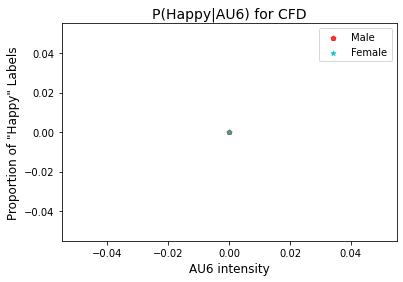

In [218]:
#AU_values_male = list(male_frame.AU06_r.unique())
AU_values_male = list(male_frame.AU06_r.value_counts()[male_frame.AU06_r.value_counts() >= 10].index)
happy_proportion_male = []
for AU_value in AU_values_male:
    subframe = male_frame.loc[male_frame.AU06_r == AU_value]
    happy_proportion_male.append(subframe.Happy.mean())
plt.scatter(AU_values_male, happy_proportion_male, label="Male", marker = "p", alpha=0.8, s=25, c='r')#,edgecolors='k')

#AU_values_female = list(female_frame.AU06_r.unique())
AU_values_female = list(female_frame.AU06_r.value_counts()[female_frame.AU06_r.value_counts() >= 10].index)
happy_proportion_female = []
for AU_value in AU_values_female:
    subframe = female_frame.loc[female_frame.AU06_r == AU_value]
    happy_proportion_female.append(subframe.Happy.mean())
plt.scatter(AU_values_female, happy_proportion_female, label="Female", marker = "*", alpha=0.8, s=25, c='c')#,edgecolors='k')


plt.xlabel('AU6 intensity', fontsize = 'large')
plt.ylabel('Proportion of "Happy" Labels', fontsize = 'large')
plt.title('P(Happy|AU6) for CFD', fontsize = 14)
plt.legend()
#plt.xlim(-0.1, 3)
plt.show()

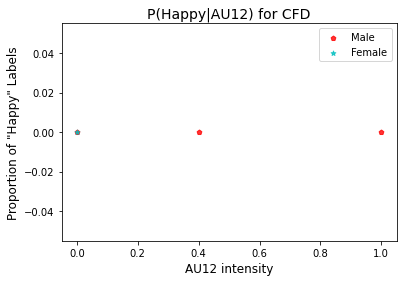

In [219]:
#AU_values_male = list(male_frame.AU06_r.unique())
AU_values_male = list(male_frame.AU12_r.value_counts()[male_frame.AU12_r.value_counts() >= 10].index)
happy_proportion_male = []
for AU_value in AU_values_male:
    subframe = male_frame.loc[male_frame.AU12_r == AU_value]
    happy_proportion_male.append(subframe.Happy.mean())
plt.scatter(AU_values_male, happy_proportion_male, label="Male", marker = "p", alpha=0.8, s=25, c='r')#,edgecolors='k')

#AU_values_female = list(female_frame.AU06_r.unique())
AU_values_female = list(female_frame.AU12_r.value_counts()[female_frame.AU12_r.value_counts() >= 10].index)
happy_proportion_female = []
for AU_value in AU_values_female:
    subframe = female_frame.loc[female_frame.AU12_r == AU_value]
    happy_proportion_female.append(subframe.Happy.mean())
plt.scatter(AU_values_female, happy_proportion_female, label="Female", marker = "*", alpha=0.8, s=25, c='c')#,edgecolors='k')


plt.xlabel('AU12 intensity', fontsize = 'large')
plt.ylabel('Proportion of "Happy" Labels', fontsize = 'large')
plt.title('P(Happy|AU12) for CFD', fontsize = 14)
plt.legend()
#plt.xlim(-0.1, 3)
plt.show()

To formally show that there is a significant difference between the two logistic lines, we need logistic regression:

In [220]:
formula = 'Happy ~ AU06_r + AU12_r + gender_preds'
model = smf.glm(formula = formula, data=frame, family=sm.families.Binomial())
result = model.fit()
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Happy   No. Observations:                 1207
Model:                            GLM   Df Residuals:                     1203
Model Family:                Binomial   Df Model:                            3
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -166.37
Date:                Sun, 02 Aug 2020   Deviance:                       332.75
Time:                        12:47:21   Pearson chi2:                     966.
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -6.6486 

In [221]:
formula = 'Happy ~ (AU06_r + AU12_r) * gender_preds'
model = smf.glm(formula = formula, data=frame, family=sm.families.Binomial())
result = model.fit()
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Happy   No. Observations:                 1207
Model:                            GLM   Df Residuals:                     1201
Model Family:                Binomial   Df Model:                            5
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -165.14
Date:                Sun, 02 Aug 2020   Deviance:                       330.28
Time:                        12:47:21   Pearson chi2:                     864.
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

In [222]:
formula = 'Happy ~ I(AU06_r + AU12_r) * gender_preds'
model = smf.glm(formula = formula, data=frame, family=sm.families.Binomial())
result = model.fit()
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Happy   No. Observations:                 1207
Model:                            GLM   Df Residuals:                     1203
Model Family:                Binomial   Df Model:                            3
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -184.83
Date:                Sun, 02 Aug 2020   Deviance:                       369.65
Time:                        12:47:21   Pearson chi2:                     781.
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------